#Importing Necessary Libraries

In [56]:
#importing all the necessaray library for dataset loading, data visualization and model building
import numpy as np #used for working with homogeneous arrays
import pandas as pd #used for loading the dataset files and for processing the files
import matplotlib.pyplot as plt #used for data visualization
import seaborn as sns #used for data visualization

from sklearn.preprocessing import LabelEncoder #used for ordinal encoding of catagorical data
from sklearn.model_selection import train_test_split #used for splitting our data into training and testing
from sklearn import metrics #used for generation confusion matrix and other accuracy checking functions

from sklearn.linear_model import LinearRegression, LogisticRegression #functions used for building linear and logistic regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #used for determining the residuals and the model's efficiency

from sklearn.svm import SVR #function used for building a svm regression model

from sklearn.preprocessing import StandardScaler #used for scaling the dataframe columns using standard scaling or z-score normalization

from sklearn.ensemble import RandomForestClassifier #function used for building Random Forest Classification Model

from sklearn.model_selection import GridSearchCV #used for finding the best hyperparameters for models

from sklearn.feature_selection import SelectKBest #used for selecting the best features(feature selection) => filter method
from sklearn.feature_selection import chi2, mutual_info_classif #used by the function SelectKBest function for feature selection

from sklearn.feature_selection import SequentialFeatureSelector #used for features selection (SFS, SBS) => Wrapper Method

#Classification

##Loading Dataset for Classification

In [57]:
classification_df = pd.read_csv("/content/drive/MyDrive/AI/AI_COURSEWORK/breastAltered.csv") #used read_csv() function of panadas library to gain the access of the content of the csv file in the form of a dataframe

In [58]:
classification_df.head() #used head() function of the pandas library to display the first 5 content of the dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
classification_df.tail() #used tail() function of the pandas library to display the last 5 rows of the dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424.0,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682.0,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954.0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241.0,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751.0,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


##Inspection of Dataset for Classification

*   Who created the dataset?
> The dataset was created by William Wolberg, Olvi Mangasarian, Nick Street, W.Street.



*  How did I get the access to the dataset?
> I got the access of the dataset through Kaggle which is one of the largest data science platform. It is used by the individuals involved in data science and machine learing.


 **Attributes of a dataset:**

>Features
> * id   
> * radius_mean  
> * texture_mean  
> * perimeter_mean  
> * area_mean  
> * smoothness_mean  
> * compactness_mean  
> * concavity_mean  
> * concave points_mean  
> * symmetry_mean  
> * fractal_dimension_mean  
> * radius_se  
> * texture_se  
> * perimeter_se  
> * area_se  
> * smoothness_se  
> * compactness_se  
> * concavity_se  
> * concave points_se  
> * symmetry_se  
> * fractal_dimension_se  
> * radius_worst  
> * texture_worst  
> * perimeter_worst  
> * area_worst  
> * smoothness_worst  
> * compactness_worst  
> * concavity_worst  
> * concave points_worst  
> * symmetry_worst  
> * fractal_dimension_worst  

>Target
> * diagnosis

**Dataset Objective**
> The objective of the dataset is to predict whether a person has breast cancer or not based on the various medical factors like: size of the breast lump, smoothness, radius and so on

**Dataset Status**
> The dataset contain 32 columns. Each column have different purpose except for one unnamed column which is for the numbering of the dataset rows.

**Size of the dataframe**
>The number of elements in the dataframe is 18208

>The total number of columns is 33

>The total number of rows is 569

> The memory occupied by the dataset is 146.8KB approx.


In [60]:
classification_df.size #size attribute is used to find the number of elements in the dataset

18208

In [61]:
classification_df.info(verbose = False) #used .info function of the pandas library to gain the details of the dataset and passed and argument verbose = false to avoid displaying the full summary of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Columns: 32 entries, id to fractal_dimension_worst
dtypes: float64(31), object(1)
memory usage: 142.4+ KB


##Data Cleaning

###Searching for Missing Values and Duplicate Columns

In [62]:
classification_df.isnull().sum() #using the isna() function to find the null values in the dataset and used the sum() function to find the sum of the null values in each dataset column

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,3
perimeter_mean,0
area_mean,1
smoothness_mean,3
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [63]:
print("Total Number of Missing Values:",classification_df.isna().sum().sum()) #used another sum() function to find out the total number of missing values in the dataframe

Total Number of Missing Values: 25


In [64]:
print("Duplicated Columns:",classification_df.duplicated().sum()) #checking for duplicated columns in the dataframe
#df.drop_duplicates() is used for removing the duplicate rows in the dataset(none in our case)

Duplicated Columns: 0


**Columns with Missing Values**

> The columns with missing values:
* texture_mean
* area_mean
* smoothness_mean
* radius_se
* concave points_se
* symmetry_se
* perimeter_worst
* smoothness_worst
* symmetry_worst

> The are 9 columns with missing values. The column with the highest missing values is perimeter_worst i.e 5 missing values.

###Cleaning the Numerical Columns Using the Data Imputation Techniques(mean, median)

In [65]:
classification_df.drop(columns = 'id', inplace = True) #removing the column id because it does not help us in any ways in the process of data analysis

In [66]:
classification_df.select_dtypes(include = np.number).isnull().sum() #used to check the columns with missing values of numeric type

,0
radius_mean,0
texture_mean,3
perimeter_mean,0
area_mean,1
smoothness_mean,3
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0
fractal_dimension_mean,0


In [67]:
classification_df[classification_df['texture_mean'].isnull() == True] #searching the missing values of texture_mean column using a condition with which the row containing the null values will be shown

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
102,B,12.180,NaN,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,...,13.340,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878
358,B,8.878,NaN,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431
451,M,19.590,NaN,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,...,21.440,30.96,139.80,1421.0,0.1528,0.18450,0.39770,0.14660,0.2293,0.06091


The minimun and maximun values of the column 'texture_mean' seen to check the distribution of the values.

In [68]:
print("Max Value of texture mean: ", classification_df['texture_mean'].max()) #max() function used to find out the highest value of texture_mean column
print("Min Value of texture mean: ", classification_df['texture_mean'].min()) #min() function used to find out the lowest value ofo texture_mean column

Max Value of texture mean:  39.28
Min Value of texture mean:  9.71


Using Mean of the texture_mean column to fill the missing values

In [69]:
#We can see three missing values of texture_mean in the rows 102, 358, 451
classification_df['texture_mean'].fillna(value = classification_df['texture_mean'].mean(), inplace = True) #used the fillna method to fill the missing values in the column with the mean of 'texture_mean' column
classification_df['texture_mean'].isnull().sum() #checking if the texture_mean column has been cleaned

<ipython-input-69-85e667ef8492>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  classification_df['texture_mean'].fillna(value = classification_df['texture_mean'].mean(), inplace = True) #used the fillna method to fill the missing values in the column with the mean of 'texture_mean' column


0

**Mean use Justification**
> * In the 'texture_mean' column, the mean is used to fill up the missing values because we can wee that the distribution of variable is not vast.

In [70]:
classification_df[classification_df['area_mean'].isnull() == True] #searching the rows with missing value of the column area_mean and displaying it

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
30,M,18.63,25.11,124.8,NaN,0.1064,0.1887,0.2319,0.1244,0.2183,...,23.15,34.01,160.5,1670.0,0.1491,0.4257,0.6133,0.1848,0.3444,0.09782


Minimum and the maximum values of the column 'area mean' is used to check how widely if the data distributed

In [71]:
print("Minimum Value of area_mean: ",classification_df['area_mean'].min()) #using min() function to find the minimum value of area_mean
print("Maximum value of area_mean: ", classification_df['area_mean'].max()) #using max() function to find the maximun value of area_mean

Minimum Value of area_mean:  143.5
Maximum value of area_mean:  2501.0


In [72]:
classification_df['area_mean'].fillna(value = classification_df['area_mean'].median(), inplace = True) #used fillna to replace the missing values with the median of the column using the median() function
classification_df['area_mean'].isnull().sum() #checking if the missing values of the column has been filled or not

<ipython-input-72-64c6e7acd5b5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  classification_df['area_mean'].fillna(value = classification_df['area_mean'].median(), inplace = True) #used fillna to replace the missing values with the median of the column using the median() function


0

**Median Use Justification**
>- Since the data of the area_mean column is relatively highly distrubuted we used the median method of data imputation for the column

> For the remaining columns with missing values:

> We check their minimum and maximum values to find the data distribution and use mean method for the columns with lower distribution and median for the columns with higher distribution of data

In [73]:
print(f"smoothness_mean => min: {classification_df['smoothness_mean'].min()}, max: {classification_df['smoothness_mean'].max()}")
print(f"radius_se => min: {classification_df['radius_se'].min()}, max: {classification_df['radius_se'].max()}")
print(f"concave points_se => min: {classification_df['concave points_se'].min()}, max: {classification_df['concave points_se'].max()}")
print(f"symmetry => min: {classification_df['symmetry_se'].min()}, max: {classification_df['symmetry_se'].max()}")
print(f"perimeter_worst => min: {classification_df['perimeter_worst'].min()}, max: {classification_df['perimeter_worst'].max()}")
print(f"symmetry_worst => min: {classification_df['symmetry_worst'].min()}, max: {classification_df['symmetry_worst'].max()}")
print(f"symmetry_se => min: {classification_df['symmetry_se'].min()}, max: {classification_df['symmetry_se'].max()}")


smoothness_mean => min: 0.05263, max: 0.1634
radius_se => min: 0.1115, max: 2.873
concave points_se => min: 0.0, max: 0.05279
symmetry => min: 0.007882, max: 0.07895
perimeter_worst => min: 50.41, max: 251.2
symmetry_worst => min: 0.1565, max: 0.6638
symmetry_se => min: 0.007882, max: 0.07895


> We can see that the columns with higher distibution as well as columns with lower distributin

> Mean Imputation for columns (less distribution):
> * smoothness_mean
> * concave points_se
> * symmetry_worst

> Median Imputation for columns (vaster distribution):
> * radius_se
> * symmetry_se
> * perimeter_worst
> *smoothness_worst

In [74]:
 #used the fillna method to fill the missing values in the columns with the mean of the respective columns using the mean() method
classification_df['smoothness_mean'].fillna(value = classification_df['smoothness_mean'].mean(), inplace = True)
classification_df['concave points_se'].fillna(value = classification_df['concave points_se'].mean(), inplace = True)
classification_df['symmetry_worst'].fillna(value = classification_df['symmetry_worst'].mean(), inplace = True)

classification_df[['smoothness_mean', 'concave points_se', 'symmetry_worst']].isnull().sum() #checking if the null values have been filled or not

<ipython-input-74-3e87fb80ae1e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  classification_df['smoothness_mean'].fillna(value = classification_df['smoothness_mean'].mean(), inplace = True)
<ipython-input-74-3e87fb80ae1e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,0
smoothness_mean,0
concave points_se,0
symmetry_worst,0


In [75]:
#using fillna method to fill the missing values in the columns with the median of the respective columns using the median() method
classification_df['radius_se'].fillna(value = classification_df['radius_se'].mean(), inplace = True)
classification_df['symmetry_se'].fillna(value = classification_df['symmetry_se'].mean(), inplace = True)
classification_df['perimeter_worst'].fillna(value = classification_df['perimeter_worst'].mean(), inplace = True)
classification_df['smoothness_worst'].fillna(value = classification_df['smoothness_worst'].mean(), inplace = True)

classification_df[['radius_se', 'symmetry_se', 'perimeter_worst', 'smoothness_worst']].isnull().sum() #checking if the null values have been filled or not

<ipython-input-75-a287557554e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  classification_df['radius_se'].fillna(value = classification_df['radius_se'].mean(), inplace = True)
<ipython-input-75-a287557554e2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

,0
radius_se,0
symmetry_se,0
perimeter_worst,0
smoothness_worst,0


In [76]:
classification_df.isnull().sum() #checking for any remaining null data in any of the columns

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


###Cleaning the categorical columns

In [77]:
classification_df.select_dtypes(exclude = np.number).isnull().sum() #checking if the categorical columns have any null values or not

,0
diagnosis,0


> In our dataset there is only one categorical variable i.e the targer variable itselt and it does not contain any null values
> Incase of null values in categorical columns we can use the data imputation techniques like:
> * filling the missing values with mode of the column
> * filling the missing values using ffill() method which fills the missing value with the nearest feasible value in the column

Mode Use:
> * Mode is used for filling the categorical data because we cannot calculate the median or mean for categorical data.

Use of ffill:
> * ffill is used to fill the missing values in columns with the most recent feasible value in the column. ffill is used to diversify the method of data imputation and it is also considered as a simple method of data imputation

##Summary Statistics

###For Numerical Columns

In [78]:
classification_df.select_dtypes(include = np.number).head() #displaying the columns with numerical values in the dataframe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
Cnumeric_cols = classification_df.select_dtypes(include = np.number) #storing the numeric columns in 'Cnumeric_cols' variable
print("Variance of the Columns: \n", Cnumeric_cols.var()) #displaying the variance of the different variables of the dataset

Variance of the Columns: 
 radius_mean                    12.418920
texture_mean                   18.413386
perimeter_mean                590.440480
area_mean                  123532.232848
smoothness_mean                 0.000197
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076835
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1116.211358
area_worst                 324

> Variance helps us to determine how far is each data point from the mean.

> We can see the variance of the dataset using the var() function


In [80]:
Cnumeric_cols.describe() #used the decribe function to gain the statistical summary of our dataframe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.284099,91.969033,653.941388,0.096309,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.174947,880.583128,0.132326,0.254265,0.272188,0.114606,0.290302,0.083946
std,3.524049,4.291082,24.298981,351.471525,0.014032,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.409749,569.356993,0.022771,0.157336,0.208624,0.065732,0.061749,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.180000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.160000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250600,0.071460
50%,13.370000,18.870000,86.240000,548.750000,0.095920,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.820000,686.500000,0.131400,0.211900,0.226700,0.099930,0.282600,0.080040
75%,15.780000,21.780000,104.100000,782.600000,0.105100,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.000000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Output Observation**

> In the dataframe, we can observe the follwing things:

> The standard deviation of each column

>The mean of the columns

> The minimun and maximum values of each column

>The number of data points in each column

>The 25%, 50% and 75% represent the percentiles of the columns. The percentiles represent the percentage of values lower than a specific number

###For Categorical Columns

In [81]:
Ccategorical_cols = classification_df.select_dtypes(exclude = np.number) #storing the categorical columns in a variable called Ccategorical_cols
Ccategorical_cols
#We can see that we have only one categorical column in the whole dataframe which is the target variable itself

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [82]:
Ccategorical_cols['diagnosis'].unique() #using the unique() function to find the unique elements of the categorical column

array(['M', 'B'], dtype=object)

In [83]:
print("Mode of the categorical column(diagnosis): \n", Ccategorical_cols.mode()) #using the mode() function to find the mode of the categorical column
#We can see that the mode of the only categorical column is B which represents Benign

Mode of the categorical column(diagnosis): 
   diagnosis
0         B


##Data Visualization and Interpretation (Classification)

###Univariate Analysis

####Histogram (Radius of the tumor)

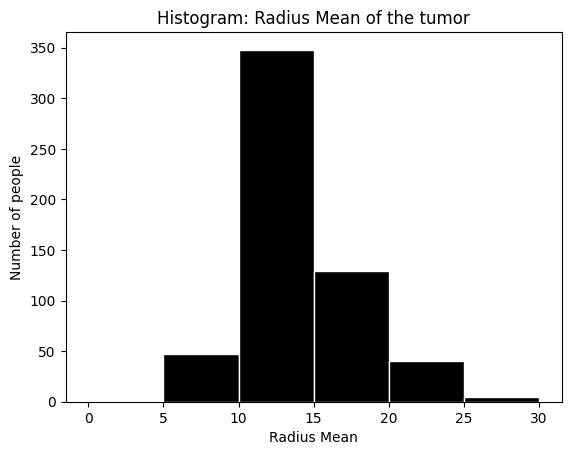

In [84]:
bins =  [0, 5, 10, 15, 20, 25, 30] #creating bins in the interval of 5 for the best visualization of histogram

plt.title("Histogram: Radius Mean of the tumor") # used for displaying the title of the figure

plt.hist(classification_df['radius_mean'], bins = bins,  color='#000', edgecolor = "#fff") #used plt.hist() function to create a histogram for the column radius_mean and adjusted some properties of the figure
plt.xlabel("Radius Mean") #Labeling the x-axis
plt.ylabel("Number of people") #Labeling the y-axis
plt.xticks(bins) #Setting the values of the x-axis ticks in the same intervals as the bins for better readability presentation

plt.show() #used for showing the histogram

Text(0, 0.5, 'Density of people')

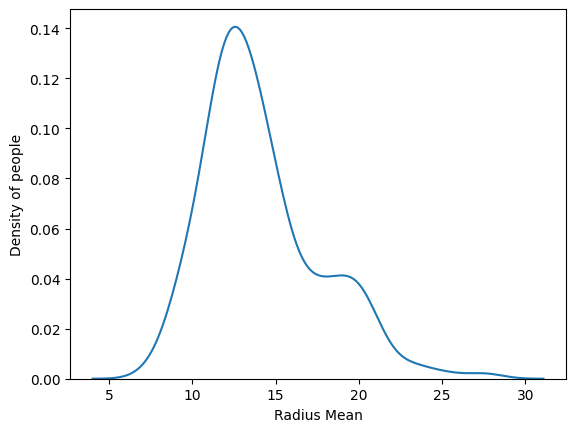

In [85]:
sns.kdeplot(classification_df['radius_mean']) #using the sns kdeplot to get see the skewness of data of the histogram
plt.xlabel("Radius Mean") #labeling the x-axis
plt.ylabel("Density of people") #labeling the y-axis

**Histogram**
> In the histogram, we can see that highest number of people have radius of tumor from 10 to 15

> The low number of people have radius of tumor from 25 to 30

> **Skewness:** In the histogram we can see that the data is slightly right skewed as the tail of the histogram is towards the right which we can see from the kdeplot

>Mean > Median > Mode

> **Modality Distribution:** In the histogram we can see that the distribution is unimodal as there is only one significant peak in the histogram

####Barplot (Diagnosis - Target Variable)

<ipython-input-86-b454cb6b4b6b>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values.append(classification_df[classification_df['diagnosis'] == name].count()[0]) #appending the count of unique values in the value list
<ipython-input-86-b454cb6b4b6b>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values.append(classification_df[classification_df['diagnosis'] == name].count()[0]) #appending the count of unique values in the value list


<BarContainer object of 2 artists>

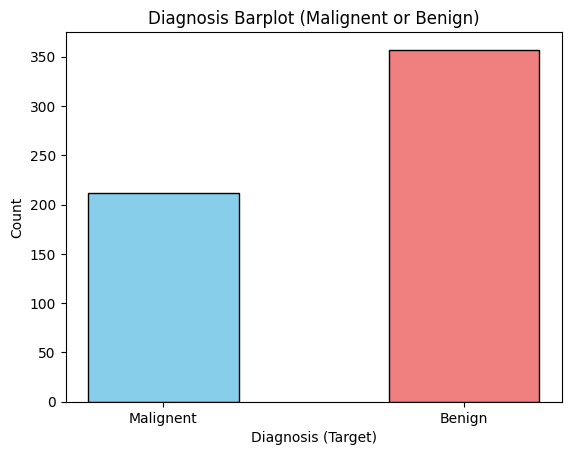

In [86]:
values = [] #declaring a empty array to store the count of both malignant and benign in the diagnosis column

labels = ["Malignent", "Benign"] #initializing the labels
for name in classification_df['diagnosis'].unique(): #used for loop to interate through the unique values of diagnosis column and get the total number of both unique values
  values.append(classification_df[classification_df['diagnosis'] == name].count()[0]) #appending the count of unique values in the value list
plt.title("Diagnosis Barplot (Malignent or Benign)") #Creating the title of the figure
plt.ylabel("Count") #labeling the y-axis of the figure
plt.xlabel("Diagnosis (Target)") #labeling the x-axis of the figure
plt.bar(labels, values, color = ['skyblue', 'lightcoral'], width=0.5, edgecolor = "#000") #using plt.bar() function to create a bar plot for the column diagnosis

**Barplot**

>Bar plot is used to show the modality distribution of the categorical data

>**Modality distribution:**  In the barchart we can see that there is only one peak so it is a unimodal distribution

> In the barplot, we can see the number of people who are in the malignent catergory and the number of people in the benign category.

>Around 200 people are in the Malignent (cancerous) Category.

>Around 350 people are in the Benign(non-cancerous) Category.


####Box plot (Radius Worst)

<ipython-input-87-aa8e31efb556>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(classification_df['radius_worst'], labels=['Raduis Worst', ]) #used boxplot function to create the boxplot of the radius_worst column


Text(0, 0.5, 'Radius_Worst Value ')

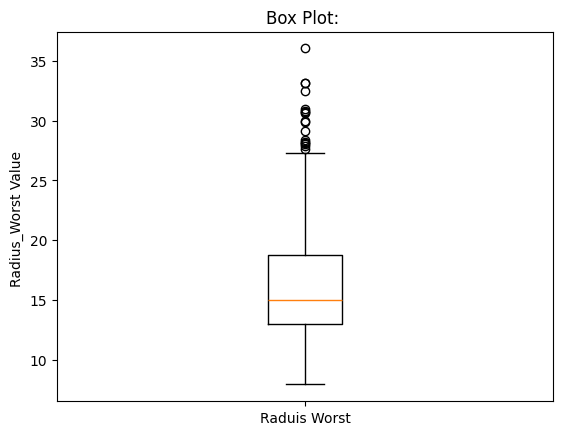

In [87]:
plt.title("Box Plot: ") #creating the title of the figure
plt.boxplot(classification_df['radius_worst'], labels=['Raduis Worst', ]) #used boxplot function to create the boxplot of the radius_worst column
plt.ylabel("Radius_Worst Value ")#labeling the y-axis of the figure

**Box Plot:**
> Box plot is primarily used by us to identify the outliers in the dataset but we can also observe the central tendency of the data, outlier, minimum and maximum values of the data.

> Q1 => 13 (approx.)

> Q2(Median) => 15 (approx.)

> Q3 => 18 (approx.)

> We can see that the majority of the people have the radius_worst near to 15 which means that the maximum values among all measurements.

> The outliers of the 'radius_worst' column start from around 27 to 35+.




---

###Bivariate Analysis

In [88]:
labelEncoder = LabelEncoder() #using sklearns LabelEncoder function to convert categorical data to numerical data or ordinal encoding
classification_df["diagnosis"] = labelEncoder.fit_transform(classification_df['diagnosis']) #m=>1, b=>0

> The categorical column which is also the target variable of the dataset is changed to numerical using label encoder which ordinally encodes the categorical column

####Pairplot

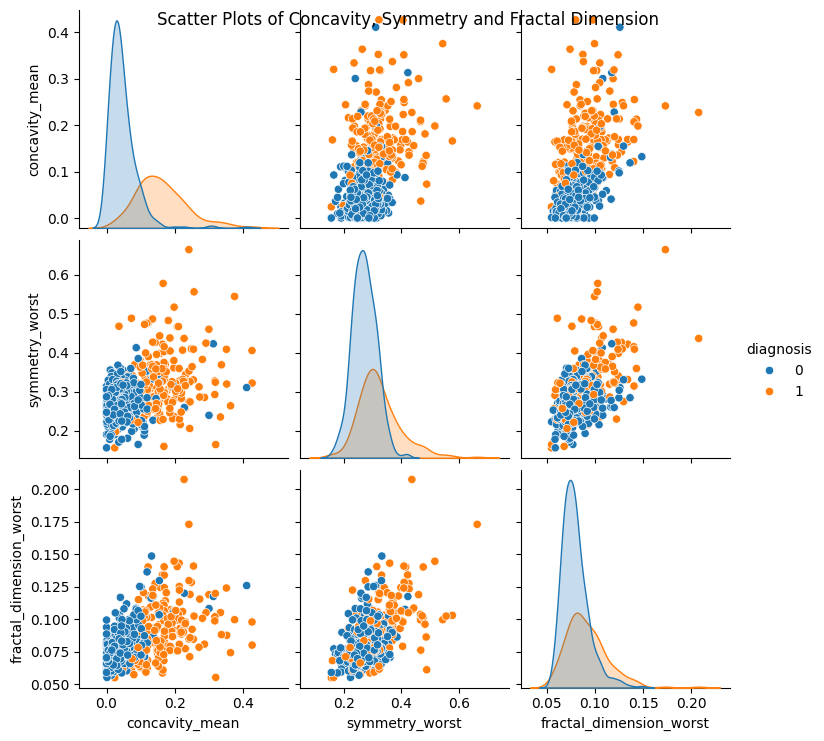

In [89]:
plot = sns.pairplot(classification_df, vars = ['concavity_mean', 'symmetry_worst', 'fractal_dimension_worst'], hue = 'diagnosis')
#used sns.pairplot function to get the grid or grouped scatter plots of different columns
plot.fig.suptitle("Scatter Plots of Concavity, Symmetry and Fractal Dimension") #Creating the title of the pairplot
plt.show() #used for displaying the pairplot

**Pairplot:**
> In the pair plot we can see that there is a positive relation between the variables. As the value of x-axis increases there is a trend of increasing y-axis values.

> We can also see that the concentration people with benign is at the lower values of x and y whereas the concentration of with malignant is at the higher values of x and y.

####Scatter Plot

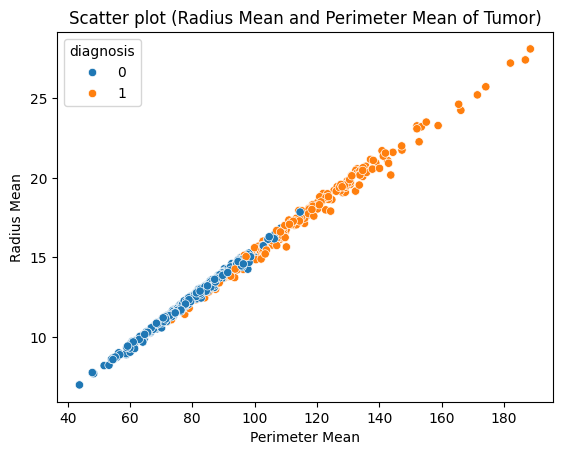

In [90]:
plt.title('Scatter plot (Radius Mean and Perimeter Mean of Tumor)') #creating the title of the scatter plot

sns.scatterplot(data = classification_df, x = 'perimeter_mean', y = 'radius_mean', hue = 'diagnosis') #using the seaborns scatterplot() function to plot the scatter plot for two variables - radius mean and perimeter mean of tumor
#hue is used to mapp the diagnosis value over the plot to find patterns
plt.ylabel("Radius Mean") #labeling the y-axis
plt.xlabel("Perimeter Mean") #labeling the x-axis

plt.show() #used to display the scatterplot

**Scatterplot:**
> In the scatterplot, we can see that as the value of perimeter mean increases the value of radius mean is also increasing which is the indication of strong positive correlation.

> The people with lower radius mean and perimeter mean of the tumor are classified to the benign class and the people with higher radius mean and perimeter mean of the tumor are classified to malignant class.

####Heatmap (Correlation between different variables):

<Axes: >

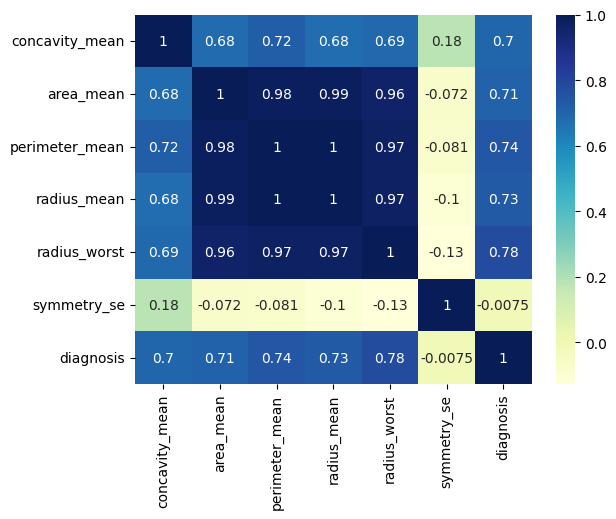

In [91]:
sns.heatmap(classification_df[['concavity_mean', 'area_mean','perimeter_mean', 'radius_mean', 'radius_worst','symmetry_se','diagnosis']].corr(), annot = True, cmap = "YlGnBu")

**Heatmap**
> In the heatmap, we can see the correlation between multiple variables of the dataset.

> The value of correlation ranges from -1 to 1

>The highest correlation of the target variable(diagnosis) in the heatmap is with radius_worst i.e. 0.78

>The lowest correlation of the target variable in the heatmap is with symmetry_se i.e -0.0075

> We can also see that some of the columns have 1 correlation which is the strongest correlation

> We can also see that the diagonal elements of the heatmap are all 1's because the heatmap elements are correlating to themselves. Or, the variance and the co-variance of the elements is the same which results in 1 correlation.



##**Classification Models**

###Train Test Split and Scaling

In [92]:
l_x = classification_df.drop(columns = 'diagnosis') #storing the feature variables of the dataset in variable called 'l_x'
l_y = classification_df['diagnosis'] #storing the target variable of the dataset in variable called 'l_y

In [93]:
L_X_train, L_X_test, l_y_train, l_y_test = train_test_split(l_x, l_y, test_size = 0.2) #splitting the data into two parts: train and testing
#the training data is created for building the models
#the testing data is created for evalutation of the model or for checking if the model is generalized or not

>Standard Scaling is the method of data preprocessing where we make the columns to have 0 mean and standard deviation of 1.

> In our dataset we can observe that some of the feature columns have high value data whereas some of the columns have low value data. Thus we are using the standard scaling so that the columns with higher values do not dominate the model

>We are using standard scaling or using z-score normalization to avoid the columns with larger values to overshadow the columns with lower values

In [94]:
scaler = StandardScaler() #calling the StandardScaler function and storing the returned value in scaler variable

In [95]:
L_X_train_scaled = scaler.fit_transform(L_X_train) #using the scaler's fit_transform function to scale the training data
L_X_test_scaled = scaler.transform(L_X_test) #using the scaler's transform function to scale the for testing

> fit_transform function calculated all the necessary parameters for standard scaling like mean and standard deviation and then transforms the data

>whereas the transform function only transforms the data using the old parameters taken out by the fit_transform function

>this is done to avoid the model from acquiring any knowledge about the test data

###**Logistic Regression**

> Logistic Regression is the method of supervised machine learning for classification which uses the linear equation and applies a logistic function on top of it for classification

####Before Using Scaled Data

Using the LogisticRegression() function from the sklearn library to create the logistic regression model

In [96]:
Logistic_Regression_Model = LogisticRegression().fit(L_X_train, l_y_train) #using the LogisticRegression function function model building and fitting the training data in the model for training the model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
l_y_pred_train = Logistic_Regression_Model.predict(L_X_train) #using the built model to predict the training target variable
l_y_pred_test = Logistic_Regression_Model.predict(L_X_test) #using the built model to predict the testing target variable

In [98]:
Logistic_Regression_Model.score(L_X_train, l_y_train) #displaying the accuracy score of the model in training data

0.9406593406593406

In [99]:
Logistic_Regression_Model.score(L_X_test, l_y_test) #displaying the accuracy score of the model in testing data

0.9473684210526315

 >  **Accuracy score is the ratio of correctly predicted observation to the total number of observations**

In [100]:
confusionMatrix = metrics.confusion_matrix(l_y_test, l_y_pred_test) #confusion matrix calculated for observing the true positives, false positives, true negatives and false negatives of the model

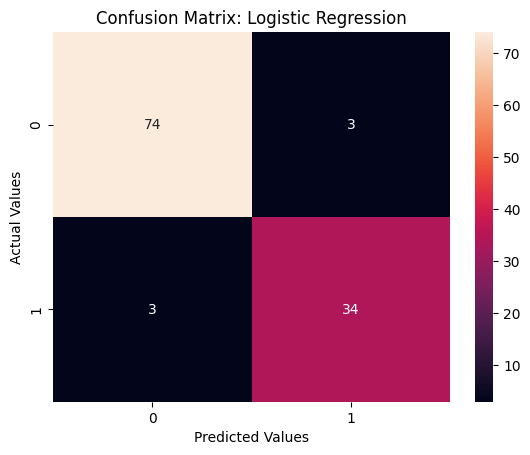

In [101]:
plt.title("Confusion Matrix: Logistic Regression") #creating the title of the heatmap
sns.heatmap(confusionMatrix, annot = True) #using the seaborn's heatmap function to create a heatmap for displaying the confusion matrix
plt.ylabel("Actual Values") #labeling the y-axis of the figure
plt.xlabel("Predicted Values") #labeling the x-axis of the figure
plt.show() #used for displaying the figure

> Confusion Matrix helps us to see the number of correctly classified target and the number of incorrectly classified targets

> In the confusion matrix heatmap, we have the actutal values in the y-axis and predicted values in the x-axis

>From the heatmap we can observe that the model has predicted following things:
>*   True Positives => 43
>* False Positives => 1
>* True Negatives => 67
> *False Negatives => 3




In [102]:
print(metrics.classification_report(l_y_test, l_y_pred_test)) #the classification from the metric class is used for gain the classification report of our model

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        77
           1       0.92      0.92      0.92        37

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



> Classification report is used for finding the  recall, precision and f1-score of the model.

> Precision is the ratio of correctly predicted positive observations and the total positive observations

> Recall is the ratio of correctly predicted observations to all the observations.

> F1 score is the weighted average of Precision and Recall

> From the classification report of the model we can observe the following:
> *   Accuracy Score => 0.98
> * Precision => 0.98
> * F1-Score => 0.98
> * Macro Avg => 0.98
> *Weighted Avg => 0.98




####Afer Using Scaled Data

In [103]:
Logistic_Regression_Model_Scaled = LogisticRegression().fit(L_X_train_scaled, l_y_train) #building the model using LogisticRegression function of the sklearn library and fitting the scaled data instead of the original data

In [104]:
l_y_pred_train_scaled = Logistic_Regression_Model_Scaled.predict(L_X_train_scaled) #using the model to predict the target values of the training data
l_y_pred_test_scaled = Logistic_Regression_Model_Scaled.predict(L_X_test_scaled) #using the model to predict the target values of the testing data

In [105]:
Logistic_Regression_Model_Scaled.score(L_X_train_scaled, l_y_train) #checking the accuracy score of the model in training data

0.9868131868131869

In [106]:
Logistic_Regression_Model_Scaled.score(L_X_test_scaled, l_y_test) #checking the accuracy score of the model in testing data

0.9912280701754386

> Here we can see that the accuracy score of the model has increased after using the scaled data :

> Training: 0.94 to 0.98

> Testing: 0.96 to 0.97

In [107]:
confusionMatrixScaled = metrics.confusion_matrix(l_y_test, l_y_pred_test_scaled) #finding the confusion matrix of the model

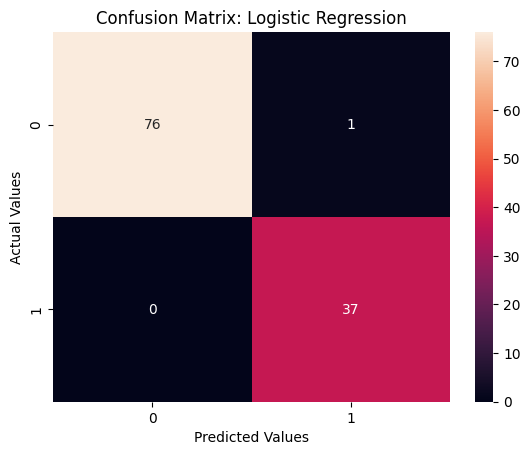

In [108]:
plt.title("Confusion Matrix: Logistic Regression") #creating the title of the figure
sns.heatmap(confusionMatrixScaled, annot = True) #using seaborn's heatmap function for displaying the confusion matrix of the heatmap
plt.ylabel("Actual Values")#labeling the y-axis of the figure
plt.xlabel("Predicted Values") # labeing the x-axis of the figure
plt.show() #used to display the figure

>From the heatmap we can observe that the model has predicted following things:
>*   True Positives => 44
>* False Positives => 0
>* True Negatives => 67
> *False Negatives => 3

> We can observe that the accuracy of the model has increased after using the scaled data instead of the unscaled data


In [109]:
print(metrics.classification_report(l_y_test, l_y_pred_test_scaled))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.97      1.00      0.99        37

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



> From the classification report of the model we can observe the following:

> * Precision => 1 and 0.94
> * Recall => 0.96 and 1
> * F1-Score => 0.98 and 0.97
> * Macro Avg => 0.97, 0.98, 0.97
> *Weighted Avg => 0.98, 0.97, 0.97


###**Random Forest Classifier**

> Random forest is a ensemble method of machine learning which uses multiple decision trees for prediction.

> Random forest are less prone to overfitting and are capable of handling higher dimension datasets

####Before using Scaled Data

In [110]:
Random_Forest_Model = RandomForestClassifier() #calling the RandomForestClassifier function and storing the returned value in a varialble for model building
Random_Forest_Model.fit(L_X_train, l_y_train) #fitting the training data in the model

RandomForestClassifier()

In [111]:
l_y_pred_train = Random_Forest_Model.predict(L_X_train) # predicting the target of the training data and storing the values in a variable
l_y_pred_test = Random_Forest_Model.predict(L_X_test) #predicting the target of the testing data and storing the value in a variable

In [112]:
Random_Forest_Model.score(L_X_train, l_y_train) #Checking the accuracy score of the model in training data

1.0

In [113]:
Random_Forest_Model.score(L_X_test, l_y_test) #checking the accuracy score of the model in testing data

0.9912280701754386

> Here, we can observe that the accuracy of the model in training data is 1 and the accuracy score of the model in testing data is 0.96. This shows that the performance of the model is good

In [114]:
confusionMatrix = metrics.confusion_matrix(l_y_test, l_y_pred_test) #finding the confusion matrix of the model to identify the true positives, false positives, true negatives and false negatives

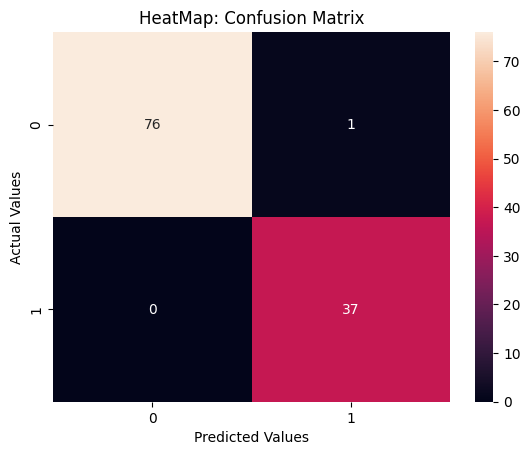

In [115]:
plt.title("HeatMap: Confusion Matrix") #creating the title of the figure
sns.heatmap(confusionMatrix, annot = True) #creating the heatmap to show the confusion matrix
plt.ylabel("Actual Values") #labeling the y-axis
plt.xlabel("Predicted Values") #labeling the x-axis
plt.show() #used for displaying the figure

> From the heatmap we can observe that the model has predicted following things:
>*   True Positives => 43
>* False Positive => 1
>* True Negatives => 67
> *False Negatives => 3

In [116]:
print(metrics.classification_report(l_y_test, l_y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.97      1.00      0.99        37

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



> From the classification report of the model we can observe the following:

> * Precision => 0.99 and 0.93
> * Recall => 0.96 and 0.98
> * F1-Score => 0.97 and 0.96
> * Macro Avg => 0.96, 0.97, 0.96
> *Weighted Avg => 0.97, 0.96, 0.97

####After using Scaled Column Data

In [117]:
Random_Forest_Model = RandomForestClassifier() #calling the RandomForestClassifier() function for model building
Random_Forest_Model.fit(L_X_train_scaled, l_y_train)# fitting the training data into the model

RandomForestClassifier()

In [118]:
l_y_pred_train = Random_Forest_Model.predict(L_X_train_scaled) #predicting the target variable of the training data
l_y_pred_test = Random_Forest_Model.predict(L_X_test_scaled) #predicting the target variable of the testing data

In [119]:
Random_Forest_Model.score(L_X_train_scaled, l_y_train) #finding the accuracy score of the model in training data

1.0

In [120]:
Random_Forest_Model.score(L_X_test_scaled, l_y_test) #finding the accuracy score of the model in testing data

1.0

> Here we can see that the accuracy score in training data of the model is 1 and the accuracy score of the model in testing data is 0.96

In [121]:
confusionMatrix = metrics.confusion_matrix(l_y_test, l_y_pred_test) #finding the confusion matrix for observing the true positives, true negatives, false positives, false negatives

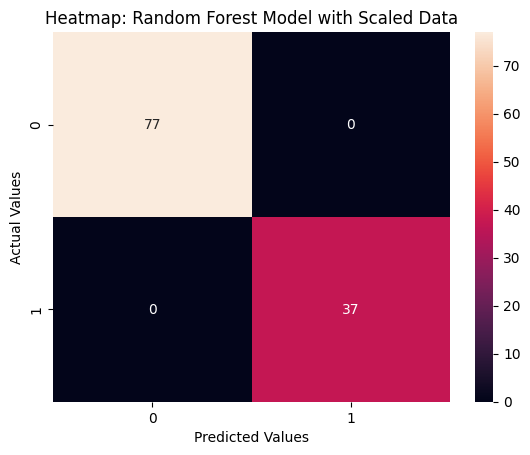

In [122]:
plt.title("Heatmap: Random Forest Model with Scaled Data") #creating the title of the figure
sns.heatmap(confusionMatrix, annot = True) #using the heatmap function to create a heatmap showing the confusion matrix
plt.ylabel("Actual Values") #labeling the y-axis
plt.xlabel("Predicted Values") #labeling the x-axis
plt.show() #used for displaying the figure

> From the heatmap we can observe that the model has predicted following things:
>*   True Positives => 43
>* False Positive => 1
>* True Negatives => 67
> *False Negatives => 3

> We can see not change in the confusion matrix after using the scaled data

In [123]:
print(metrics.classification_report(l_y_test, l_y_pred_test)) #using the classification_report function to display the precision, accuracy, recall and f1-score of the model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        37

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



> From the classification report of the model we can observe the following:

> * Precision => 0.99 and 0.93
> * Recall => 0.96 and 0.98
> * F1-Score => 0.97 and 0.96
> * Macro Avg => 0.96, 0.97, 0.96
> *Weighted Avg => 0.97, 0.96, 0.97

> The accuracy scores of the model after using the scaled data does not change.


> **Reasons of why Random Forest models do not need feature scaling:**
> * The random forest model creates multiple decision trees and the decision trees make splits in the data from the individual features. The scale of the feature does not affect the process of individual trees
> * The decision trees are not affected by outliers as they do not depend on variance or mean.

###Performace of Logistic Regression Model and Random Forest Model

> Accuracy Score of Logistic Regression
> * Training: 0.99
> * Testing: 0.97

> Accuracy Score of Random Forest Model
> * Training: 1.0
> * Testing: 0.96

> From the accuracy scores of both the models we can see that the logistic regression model is outperforming the random forest model.

> The training score of logistic regression is 0.99 and the testing accuracy score is 0.97

> The training score of random forest model is 1 and the testing accuracy score is 0.96.

> This shows that the random forest model is slightly overfitted than the logistic regression model

> Thus logistic regression model seems to be the better model

###**Hyper Parameter Tuning**

####Logistic Model

In [124]:
logistic_parameters = {'C': [0.2, 0.6, 1],
                       'fit_intercept': [True, False]} #a variable is used to store the hyperparameter values in dictionary form


In [125]:
Logistic_Regression_Model_Tuned = GridSearchCV(LogisticRegression(), logistic_parameters)
#the GridSearchCV function called with LogisticRegression function as the first parameter and the dictionary of hyperparameters as another parameter

In [126]:
Logistic_Regression_Model_Tuned.fit(L_X_train_scaled, l_y_train) #using the LogisticRegression function and also using the parameters for tuning the hyperparameters
# C is the inverse of regularization. Lower the value of C the strength of regularization also increases
# fit_intercept is the parameter to decide whether to include the intercept in the model or not
# if set to True the model will include the intercept if set to False it won't include the intercept


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.2, 0.6, 1], 'fit_intercept': [True, False]})

In [127]:
Logistic_Regression_Model_Tuned.best_params_ #displaying the best hyper parameters to use for logistic regression found using GridSearchCV

{'C': 0.6, 'fit_intercept': False}

In [128]:
print("Accuracy of Untuned Model(Training):",Logistic_Regression_Model_Scaled.score(L_X_train_scaled, l_y_train))
#displaying the training accuracy of the model witouth hyperparameter tuning

print("Accuracy of Model(Training) after hyperpameter tuning: ",Logistic_Regression_Model_Tuned.score(L_X_train_scaled, l_y_train))
#displaying the accuracy of the new model in training data after hyperparameter tuning

Accuracy of Untuned Model(Training): 0.9868131868131869
Accuracy of Model(Training) after hyperpameter tuning:  0.9868131868131869


In [129]:
print("Accuracy of Untuned Model(Testing):", Logistic_Regression_Model_Scaled.score(L_X_test_scaled, l_y_test))
#displaying the accuracy of the model in testing data without hyperparameter tuning

print("Accuracy of Model(Testing) after hyperparameter tuning:", Logistic_Regression_Model_Tuned.score(L_X_test_scaled, l_y_test))
#displaying the accuracy of the new model in testing data with hyperparameter tuning

Accuracy of Untuned Model(Testing): 0.9912280701754386
Accuracy of Model(Testing) after hyperparameter tuning: 0.9912280701754386


> Here we can see that the accuracy of the model has slightly increased after the hyper parameter tuning in testing data

In [130]:
l_y_pred_test = Logistic_Regression_Model_Tuned.predict(L_X_test_scaled)
#predicting the target variable of the test data and storing it in l_y_pred_test variable

In [131]:
confusionMatrix = metrics.confusion_matrix(l_y_test, l_y_pred_test)
#using the confusion_matrix function to find out the true positives, false positives, true negatives and false negatives

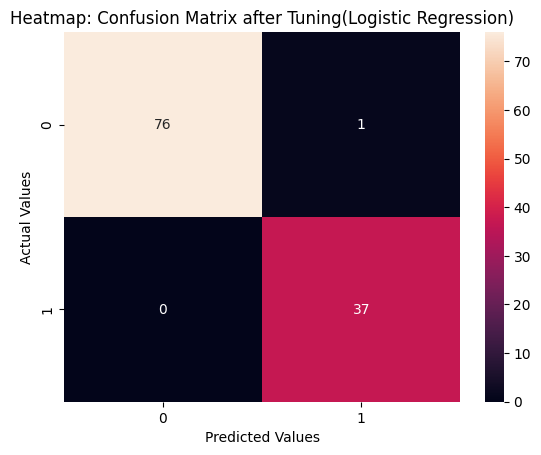

In [132]:
plt.title("Heatmap: Confusion Matrix after Tuning(Logistic Regression)") #creating the title of the figure
sns.heatmap(confusionMatrix, annot = True) #using the heatmap function to diplay confusion matrix in a heatmap
plt.ylabel("Actual Values") #labeling the ylabel
plt.xlabel("Predicted Values") #labeling the xlabel
plt.show() #used to display the figure

> For the hyperparameter tuning we used the GridSearchCV for finding the best parameters.

> For logistic regression the hyperparameters were C(inverse of regularization) and fit_intercept(whether to include the intercept or not)

> After the hyperparameter tuning the accuracy of the model in the testing data remained constant

####Random Forest

In [133]:
forest_parameters = {'n_estimators': [100, 110, 120],
              'max_depth': [9, 10, 11, 12],
              'max_features': [3, 4, 5, 6],
              'max_leaf_nodes': [9, 10, 11, 12],
              'criterion': ['gini', 'entropy', 'log_loss']
              } #setting the different parameters for choosing the best parameters among the list of parameter values
Random_Forest_Model_Tuned = RandomForestClassifier() #Using RandomForestClassifier for model building
Random_Forest_Model_Tuned = GridSearchCV(Random_Forest_Model_Tuned, forest_parameters, cv = 3, n_jobs = -1) #GridSearchCV used to search for the best hyper parameters

In [135]:
Random_Forest_Model_Tuned.fit(L_X_train, l_y_train) #fitting the model with best hyperparameters

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [9, 10, 11, 12],
                         'max_features': [3, 4, 5, 6],
                         'max_leaf_nodes': [9, 10, 11, 12],
                         'n_estimators': [100, 110, 120]})

In [136]:
Random_Forest_Model_Tuned.best_params_ #displaying the best hyperparameters to be used in the final model

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 4,
 'max_leaf_nodes': 10,
 'n_estimators': 110}

In [137]:
print("Training:")
print("Before Hyperparameter Tuning: ", Random_Forest_Model.score(L_X_train, l_y_train))
print("After Hyperparameter Tuning: ", Random_Forest_Model_Tuned.score(L_X_train, l_y_train))
#displaying the accuracy score before hyperparameter tuning and after hyperparameter tuning in training data

Training:
Before Hyperparameter Tuning:  0.38461538461538464
After Hyperparameter Tuning:  0.9868131868131869


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [138]:
print("Testing:")
print("Before Hyperparameter Tuning:", Random_Forest_Model.score(L_X_test, l_y_test))
print("After Hyperparmeter Tuning:", Random_Forest_Model_Tuned.score(L_X_test, l_y_test))
#displaying the accuracy score before hyperpameter tuning and after hyperparameter tuning in testing data

Testing:
Before Hyperparameter Tuning: 0.32456140350877194
After Hyperparmeter Tuning: 0.9912280701754386


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


> We can see that after hyperparameter tuning the accuracy of the model increases in testing data

####Observation After Hyperparameter Tuning

> We used the GridSearchCV method for hyperparameter tuning.

> We provided a list of parameters to the GridSearchCV method to find the best parameter

> After using the GridSearchCV method we got the model tuned with the best hyperparameters

> Then we also got to know the best hyperparameters among the list of parameter we provided

> After the hyperparameter tuning we got the following results:

> For Logistic Regression:
> * The accuracy score in the training data slightly decreased after the hyper parameter tuning

> * But, the accuracy score in the testing data increased after the hyper parameter tuning

> For Random Forest Classifier:
> * The acccuracy score in the training data decreased after the hyper parameter tuning

> * But the accuracy score in the testing data increased after the hyper parameter tuning

> This indicated that there is a slight overfitting of data when hyper parameter tuning is not performed

> Best HyperParameters:
> * Logistic Regression:
{'C': 0.2, 'fit_intercept': False}

> * Random Forest Classifier:
{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 6,
 'max_leaf_nodes': 11,
 'n_estimators': 110}

###**Feature Selection**

####SelectKBest

In [139]:
k_best_features = SelectKBest(chi2, k = 23) #the SelectKBest function is used with chi2 as the feature selection technique as score_func
k_best_features.fit(l_x, l_y) #fitting the features and target variable to the feature selection function

SelectKBest(k=23, score_func=<function chi2 at 0x7dd14d9b0a40>)

In [140]:
k_best_conn = k_best_features.get_support() #used to store boolean array of the  column
#if the column is selected the boolean value will be true else it'll be false

In [141]:
l_x_selected_chi = l_x[l_x.columns[k_best_conn]] #storing the selected features from chi2 method
l_x_selected_chi.head() #displaying the top 5 rows of the selected features

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,0.2419,1.0950,8.589,...,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.1812,0.5435,3.398,...,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.2069,0.7456,4.585,...,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.2597,0.4956,3.445,...,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.1809,0.7572,5.438,...,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [142]:
k_best_features = SelectKBest(mutual_info_classif, k = 23) #Using the SelectKBest function for feature selection and using mutual_info_classif as the score_func
k_best_features.fit(l_x, l_y) #fitting the features and target variable

SelectKBest(k=23, score_func=<function mutual_info_classif at 0x7dd14d989ee0>)

In [143]:
k_best_conn = k_best_features.get_support() #storing the boolean array for the columns of the dataset(selected => True, else => False)

In [144]:
l_x_selected_mutual = l_x[l_x.columns[k_best_conn]] #storing the selected columns in a variable]
l_x_selected_mutual.head() #displaying the first 5 rows of the selected columns

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,1.0950,8.589,...,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.5435,3.398,...,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.7456,4.585,...,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.4956,3.445,...,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.7572,5.438,...,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


####Checking Accuracy of Model using the selected features from param (score_fun = chi2)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(l_x_selected_chi, l_y, test_size = 0.2) #splitting the data with selected features into training and testing (chi2)

In [146]:
X_train_scaled = scaler.fit_transform(X_train) #Scaling the training data
X_test_scaled = scaler.transform(X_test) #Scaling the testing data

In [147]:
Logistic_Model_Check = LogisticRegression(C = 0.2, fit_intercept = False).fit(X_train_scaled, y_train) #fitting the model with training data

In [148]:
Logistic_Model_Check.score(X_train_scaled, y_train) #checking the accuracy of the model in training data

0.9846153846153847

In [149]:
Logistic_Model_Check.score(X_test_scaled, y_test) #checking the acccuracy score of the model in testing data

0.9824561403508771

In [150]:
Random_Model_Check = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 6, max_leaf_nodes = 11, n_estimators = 110) #Using the RandomForestClassifier for building a model
Random_Model_Check.fit(X_train, y_train) #fitting the model with training data

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=6,
                       max_leaf_nodes=11, n_estimators=110)

In [151]:
Random_Model_Check.score(X_train, y_train) #Checking the accuracy score of the model in training data

0.9978021978021978

In [152]:
Random_Model_Check.score(X_test, y_test) #Checking the accuracy score of the model in the testing data

0.9649122807017544

####Checking Accuracy of Model using the selected features from param (score_fun = mutual_info_classif)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(l_x_selected_mutual, l_y, test_size = 0.2) #splitting the data into training and testing using the selected features(mutual_info_classif)

In [154]:
X_train_scaled = scaler.fit_transform(X_train) #scaling the data with standard scaler for training data
X_test_scaled = scaler.transform(X_test) #scaling the data with standard scaler for testing data

In [155]:
Logistic_Model_Check = LogisticRegression(C = 1, fit_intercept = False).fit(X_train_scaled, y_train) #fitting the logistic regression model with selected training data

In [156]:
Logistic_Model_Check.score(X_train_scaled, y_train) #checking the accuracy score of the model in training data

0.9912087912087912

In [157]:
Logistic_Model_Check.score(X_test_scaled, y_test) #checking the accuracy score of the model in testing data

0.9649122807017544

In [158]:
Random_Model_Check = RandomForestClassifier(criterion = 'entropy', max_depth = 9, max_features = 5, max_leaf_nodes = 9, n_estimators = 110)#using the random forest classifier function to build a model
Random_Model_Check.fit(X_train, y_train) #fitting the model with training data

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=5,
                       max_leaf_nodes=9, n_estimators=110)

In [159]:
Random_Model_Check.score(X_train, y_train) #checking the accuracy score of the model in training data

0.9912087912087912

In [160]:
Random_Model_Check.score(X_test, y_test) #checking the accuracy score of the model in testing data

0.9473684210526315

####Observation

> From the above observations we can see that the while using the selected features from the chi2 is giving a good accuracy score on training data but, in the testing data, the accuracy falls. This indicates that the model is getting overfitted

> Whereas while using the selected features from the mutual_info_classif, we can see that the accuracy score of training and testing data are similar

> Thus, we are using the features selected using the mutual_info_classif for building the final modal

###**Final Model**

####Final Train, Test Split and Scaling

In [161]:
X_train, X_test, y_train, y_test = train_test_split(l_x_selected_mutual, l_y, test_size = 0.2)
#splitting the data with only selected features into training and testing with training size 80% and testing size 20%

In [162]:
X_train = scaler.fit_transform(X_train) #scaling the training data
X_test = scaler.transform(X_test) #scaling the testing data

####Logistic Regression Final Model

In [177]:

Logistic_Regression_Model = LogisticRegression(C = 0.2, fit_intercept = False, penalty = 'l2').fit(X_train, y_train)
#Creating a logistic regression model with the best hyperparameters that we got from GridSearchCV

In [178]:
Logistic_Regression_Model.score(X_train, y_train) #Checking the accuracy score of the final model in training data

0.9868131868131869

In [179]:
Logistic_Regression_Model.score(X_test, y_test) #Checking the accuracy score of the final model in testing data

0.9824561403508771

In [180]:
y_test_pred = Logistic_Regression_Model.predict(X_test) #Storing the predicted testing data target in y_test_pred variable

In [181]:
confusionMatrix = metrics.confusion_matrix(y_test, y_test_pred) #using the confusion_matrix function to get the confusion matrix of the final model

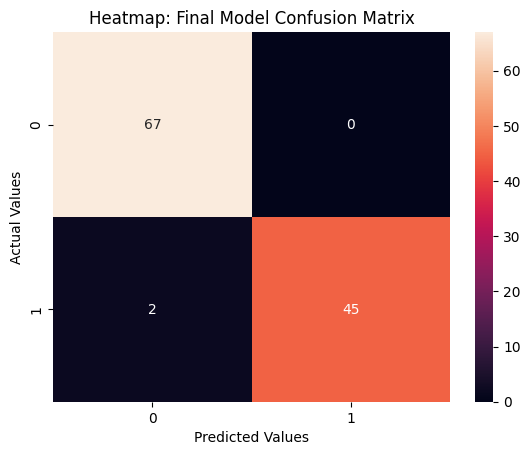

In [182]:
plt.title("Heatmap: Final Model Confusion Matrix") #Creating the title of the model
sns.heatmap(confusionMatrix, annot = True) #using heatmap function to display the confusion matrix of the final model
plt.ylabel("Actual Values") #labeling the y-axis
plt.xlabel("Predicted Values") #labeling the x-axis
plt.show() #used to display the figure

>From the heatmap we can observe that the model has predicted following things:
>*   True Positives => 41
>* False Positives => 1
>* True Negatives => 71
> *False Negatives => 1

In [183]:
print(metrics.classification_report(y_test, y_test_pred)) #using the classification_report function to find the evaluation report of the model

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



> From the classification report of the model we can observe the following:

> * Precision => 0.99 and 0.98
> * Recall => 0.99 and 0.98
> * F1-Score => 0.99 and 0.98
> * Macro Avg => 0.98 and 0.98
> *Weighted Avg => 0.98 and 0.98

####Random Forest Final Model

In [170]:
#using the RandomForestClassifier() and fitting all the best hyperparameters in the function that we obtained from GridSearchCV
Random_Forest_Model = RandomForestClassifier(criterion = 'entropy', max_depth = 9, max_features = 5, max_leaf_nodes = 9, n_estimators = 110)
Random_Forest_Model.fit(X_train, y_train) # fitting the model with the selected training data

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=5,
                       max_leaf_nodes=9, n_estimators=110)

In [171]:
Random_Forest_Model.score(X_train, y_train) #displaying the accuracy score of the model in training data

0.9912087912087912

In [172]:
Random_Forest_Model.score(X_test, y_test) #displaying the accuracy score of the model in testing data

0.9473684210526315

In [173]:
y_test_pred = Random_Forest_Model.predict(X_test) #storing the predicted target of testing data in a variable

In [174]:
confusionMatrix = metrics.confusion_matrix(y_test, y_test_pred) #finding the confusion matrix of the model

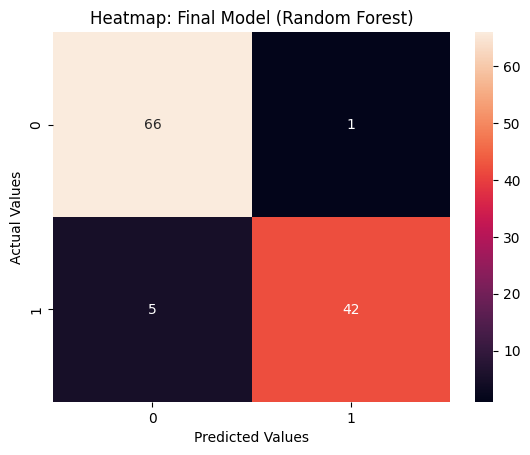

In [175]:
plt.title("Heatmap: Final Model (Random Forest)") #creating the title of the confusion matrix
sns.heatmap(confusionMatrix, annot = True) #using the seaborn's heatmap function to show the confusion matrix
plt.ylabel("Actual Values") #labeling the y-axis
plt.xlabel("Predicted Values") #labeling the x-axis

plt.show() #used to display the figure

>From the heatmap we can observe that the model has predicted following things:
>*   True Positives => 38
>* False Positives => 4
>* True Negatives => 72
> *False Negatives => 0

In [176]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



> From the classification report of the model we can observe the following:

> * Precision => 0.95 and 1
> * Recall => 1 and 0.9
> * F1-Score => 0.97 and 0.95
> * Macro Avg => 0.97, 0.95, 0.96
> *Weighted Avg => 0.97, 0.96, 0.96

###**Conclusion** (Classification)

> For Classification we built two models,
> * Logistic Regression
> * Random Forest Classifier

> First we built model of logistic regression and random forest classifier without hyper parameter tuning and feature selection

> Then, we did the hyper parameter tuning for the models and got the best hyper parameters for both the models and checked the accuracy scores of the hyper parameter tuned models

> After hyperparameter tuning we performed feature selection using SelectKBest function which helps us in feature selection using filter method. We selected the features using chi2 method and mutual_info_classif method can compared the selected features from both the methods.

> We used the better selected features which we obtained from mutual_info_classif method.

> For the final model we used the best hyperparameters and used only the selected features obtained after feature selection to build the model.

> After hyperparameter tuning and feature selection the accuracy in training data of the models decreased. But, the accuracy in testing data of the models increased.

> Logistic Regression Results: --
> * Final Model: Accuracy Score ==> 0.98

> Random Forest Classifier Results: --
> * Final Model: Accuracy Score ==> 0.96

> From this coursework, we were able to gain knowledge about data analysis, data visualization, data preprocessing. We also got knowledge about different types of machine learning models. We learnt to build machine learning models using sklearn library.

> After this coursework, I would like to learning more about supervised machine learning. And after gaining the knowlegde in supervised machine learning I would like to learn about unsupervised machine learning in the future





#Regression

##Loading Dataset for Regression

In [184]:
regression_df = pd.read_csv("/content/drive/MyDrive/AI/AI_COURSEWORK/diamonds1.csv") #loading the dataset for regression and storing the dataframe in regression_df variable
regression_df.head() #displaying the first five rows of the dataframe using head() function

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Inspection of Dataset for Regression

> * Who created the dataset?
> The dataset was created by Shivam Agrawal who is an Application Developer at IBM.

> * How did I get the access to the dataset?
> I got the access of the dataset through Kaggle which is one of the largest data science platform. It is used by individuals involded in data science and machine learning

> * Attributes of dataset:

> Features:
 * carat
 * cut
 * color
 * clarity
 * depth
 * table
 * x
 * y
 * z

> Target:
* price

**Dataset Output/Objective**
> The objective of the dataset is to predict the price of diamond with the help of data analysis, visualization, machine learning models.

> It can be useful for learning machine learning and creating machine learning models for beginners

**Dataset Status:**
> The dataset contains 10 columns and 52940 rows. The dataset is well documented with few missing values

**Total Size of the Dataframe**

> There are 539400 elements in the dataset

> The total number of columns is 10

> The total number of rows is 52940

> The total memory occupied by the dataset is around 4.1 MB

In [185]:
regression_df.size #the size attribute is used to find out the total number of elements in the entire data frame

539400

In [186]:
regression_df.info(verbose = False) #used info function of the pandas library to acquire the details of the dataset and argument verbose is made false to avoid displaying the whole summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Columns: 10 entries, carat to z
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


##Data Cleaning

###Searching for Missing Values and Duplicated Columns

In [187]:
regression_df.isnull().sum() #used the isnull() function to find the null values in each column of the dataframe and used the sum function to get the count of null values in each column

,0
carat,0
cut,0
color,3
clarity,5
depth,0
table,0
price,0
x,5
y,5
z,2


In [188]:
regression_df.isnull().sum().sum() #used another null function count the total number of missing values in the entire dataframe

20

In [189]:
print("Number of duplicate rows:", regression_df.duplicated().sum()) #using the duplicated() function to find the duplicated rows in the dataframe and used the sum function to find the count of the duplicated rows

Number of duplicate rows: 146


In [190]:
regression_df.drop_duplicates(inplace= True) #used the drop_duplicates function to delete the duplicated rows from our dataset and set the inplace to True to make the change in the original dataframe
print("Number of duplicate rows:", regression_df.duplicated().sum()) #checking if there are still duplicated rows or not in the dataframe

Number of duplicate rows: 0


**Columns with Missing Values**

> The columns with missing values are:
> * Color
> * Clarity
> * x => (length)
> * y => (width)
> * z => (depth)

###Cleaning the Numerical columns using data imputation teachniques - mean, median

In [202]:
regression_df.select_dtypes(include = np.number).isnull().sum() #checking the missing values of the numerical columns only in the dataset

,0
carat,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [203]:
#using min() and max() function to find out the minimum and maximum values of the numerical columns with missing values to determine the distribution of data
print(f"Column 'x': min => {regression_df['x'].min()}, max => {regression_df['x'].max()}")
print(f"Column 'y': min => {regression_df['y'].min()}, max => {regression_df['y'].max()}")
print(f"Column 'z': min => {regression_df['z'].min()}, max => {regression_df['z'].max()}")

Column 'x': min => 0.0, max => 10.74
Column 'y': min => 0.0, max => 58.9
Column 'z': min => 0.0, max => 31.8


>Finding the minimum and maximum values of the column to find out how vastly are the data distributed. If the value of of minimum and maximum points vary less, mean method of imputation is used and if the value of minimum and maximum points vary relatively more, median method of imputation is used

In [204]:
regression_df[regression_df["x"].isnull() == True] #searching the missing values of the x column using a condition where the row containing the null value will be shown

,carat,cut,color,clarity,depth,table,price,x,y,z


Using mean of the x column to fill up the missing values

In [205]:
regression_df['x'].fillna(value = regression_df['x'].mean(), inplace = True) #using the fillna method to fill the missing values of the x column with the mean of the x column itself
regression_df['x'].isnull().sum() #checking if the x column has missing values or not

<ipython-input-205-a3dfb7b82e23>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  regression_df['x'].fillna(value = regression_df['x'].mean(), inplace = True) #using the fillna method to fill the missing values of the x column with the mean of the x column itself


0

**Mean use Justification**
> In the 'x' column, the mean is used to fill up the missing value because the distribution of data is relatively less vast as we can see that the minimum value is 0 and the maximum value if 10.7

Using the median to fill the missing values of 'y' and 'z' column

In [206]:
regression_df[regression_df['y'].isnull() == True] #displaying the row which has missing values in 'y' column

,carat,cut,color,clarity,depth,table,price,x,y,z


In [207]:
regression_df[regression_df['z'].isnull() == True] #displaying the row which has missing values in column 'z'

,carat,cut,color,clarity,depth,table,price,x,y,z


In [208]:
regression_df['y'].fillna(value = regression_df['y'].median(), inplace = True) #filling the missing values of y column with its median
regression_df['z'].fillna(value = regression_df['z'].median(), inplace = True) #filling the missing values of z column with its median
regression_df[['y', 'z']].isnull().sum() #checking if there are still any missing values in the 'y' and 'z' columns

<ipython-input-208-1b61cae05152>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  regression_df['y'].fillna(value = regression_df['y'].median(), inplace = True) #filling the missing values of y column with its median
<ipython-input-208-1b61cae05152>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

,0
y,0
z,0


**Median use Justification**

> * We used the median method of imputation to fill up the missing values of the columns as the distribution of data was relatively vaster.

###Cleaning the Categorical Columns using the data imputation method (mode)

Using the mode to fill the null values
> Using mode fills the missing values of the column with the most recurrent value of the column

In [231]:
regression_df.select_dtypes(exclude = np.number).isnull().sum() #checking the frequency or the count of null values in the categorical columns

,0
cut,0
color,0
clarity,0


In [232]:
regression_df['color'].fillna(regression_df['color'].mode()[0], inplace = True) #filling the missing values of the column with the mode of the column
regression_df['color'].isnull().sum() #checking if there are still missing values or not

0

**Mode Use Justification**
> * Mode is used for filling the values of the categorical data here because the mean and median of the categorical columns cannot be calculated

Using ffill for the missing values

In [233]:
regression_df['clarity'].ffill(inplace = True) #used ffill() to fill the missing values of clarity column
regression_df['clarity'].isnull().sum() # checking if there are any null values remaining in the column

0

ffill Use Justification:
> * ffill is used to fill the missing values in the columns with the most recent feasible value in the column. ffill is used here to diversify the method of data imputation and it is also considered a simple method of data imputation

In [234]:
regression_df.isnull().sum() #checking if any missing value column has been left out

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


##Summary Statistics

###For Numerical Columns

In [235]:
regression_df.select_dtypes(include = np.number).head() #displaying the columns with numerical values

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [236]:
Rnumerical_cols = regression_df.select_dtypes(include = np.number) #storing the columns with numerical values in Rnumerical_cols variable
print('Variance: \n',  Rnumerical_cols.var()) #using var() function to find the variance

Variance: 
 carat    2.240983e-01
depth    2.044640e+00
table    4.989322e+00
price    1.590506e+07
x        1.255926e+00
y        1.302193e+00
z        4.970741e-01
dtype: float64


> Variance helps us to determine for far is the each data point from the mean.

>We've used .var() method to find the variance of each column of the dataframe

In [237]:
Rnumerical_cols.describe() # using decribe() method to gain the statistical summary of the dataframe

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731223,5.734684,3.538721
std,0.47339,1.429909,2.233679,3988.114460,1.120681,1.141137,0.705035
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Output Observation:**

> In the dataframe, we can observe the following things:

>The number of data points in each column

>The mean of the columns

> The standard deviation of each column

> The minimun and maximum values of each column

>The 25%, 50% and 75% represent the percentiles of the columns. The percentiles represent the percentage of values lower than a specific number



###For Categorical Columns

In [238]:
Rcategorical_cols = regression_df.select_dtypes(exclude = np.number) #storing the categorical datas in Rcategorical_cols variable
uniques = [] #declaring an empty list to store the unique value arrays
for cols in Rcategorical_cols: #using for loop to iterate through the column names of Rcategorical_cols list
  uniques.append(Rcategorical_cols[cols].unique()) #adding the unique values array of each categorical column in the uniques list

print("Unique values of 'cut' column: ", uniques[0]) #showing the array in the 0th index of the uniques list
print("Unique values of 'color' column: ",uniques[1]) #showing the array in the 1st index of the uniques list
print("Unique values of 'clarity' column: ",uniques[2]) #showing the array in the 2nd index of the uniques_list

Unique values of 'cut' column:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique values of 'color' column:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique values of 'clarity' column:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [239]:
Rcategorical_cols.mode() #mode() function used to see the modes of the categorical columns

,cut,color,clarity
0,Ideal,G,SI1


**Mode Observation:**

> Mode is the most frequently occuring value of a column

> The mode of the 'cut' column is Ideal which means that the Ideal is the highest occuring value of 'cut' column

> Similarly the mode of 'color' column is G and the mode of clarity column is 'SI1'

##Data Visualization and Interpretation (For Regression)

###Univariate Analysis

####Histogram (Diamond Price)

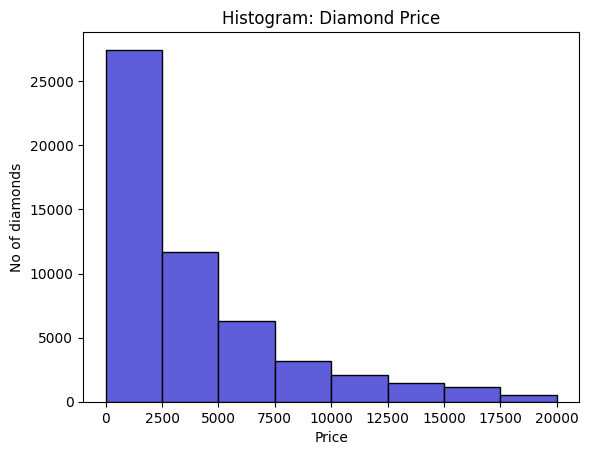

In [222]:
bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000] #creating bins in the interval of 2500 for the better visualization of the histogram

plt.title("Histogram: Diamond Price") #creating title of the figure

plt.xlabel("Price") #labeling the x-axis of the figure
plt.ylabel("No of diamonds") #labeling the y-axis of the figure
plt.hist(regression_df['price'], bins = bins, color = '#5f5dd9', edgecolor = '#000') #using plt.hist() function to create a histogram for the column price
plt.xticks(bins) #Setting the values of the x-axis ticks in the same intervals as the bins for better visual representation
plt.show() #used for displaying the histogram


**Histogram:**
> The histogram above is used to show the distribution of price in the dataset.

> From the histogram we can see that the majority of the diamonds have a lower price i.e from 2500 dollars to 7500 dollars.

> The number of diamond decreases with increase in the price

> **Skewness:** From the histogram we can observe that the data is highly right skewed. Which means:

> Mean > Median > Mode

> **Modality Distribution:** In the histogram we can see that there is only one significant peak which indicates that the histogram is unimodal

####Box Plot (Carat Value of Diamonds)

<ipython-input-223-c93b36b23f03>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(regression_df['carat'], labels = ['Carat']) #used boxplot function to create the boxplot


Text(0, 0.5, 'Carat Value')

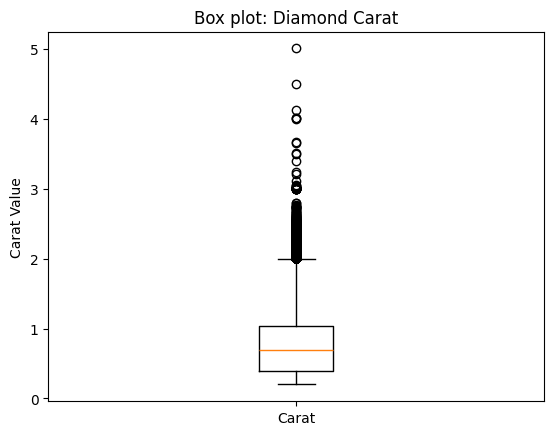

In [223]:
plt.title('Box plot: Diamond Carat') #used for displaying the title of the figure

plt.boxplot(regression_df['carat'], labels = ['Carat']) #used boxplot function to create the boxplot

plt.ylabel('Carat Value') #labeling y-axis of the figure

**Box Plot**
> Bar plot is mostly used for identifying the outliers present in the data. But we can also observe some of the statistical summaries of the variable

> Q1 => 0.4 approx.

> Q2(median) => 0.6 approx

> Q3 => 1 approx

> There are many outliers in the column that range from carat value 2 to 5

####Barplot (Cut Quality of Diamonds)

<ipython-input-224-9928f8c2e615>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values.append(regression_df[regression_df['cut'] == name].count()[0]) #appending the count of each unique value of 'cut' column in values list
<ipython-input-224-9928f8c2e615>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values.append(regression_df[regression_df['cut'] == name].count()[0]) #appending the count of each unique value of 'cut' column in values list
<ipython-input-224-9928f8c2e615>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

<BarContainer object of 5 artists>

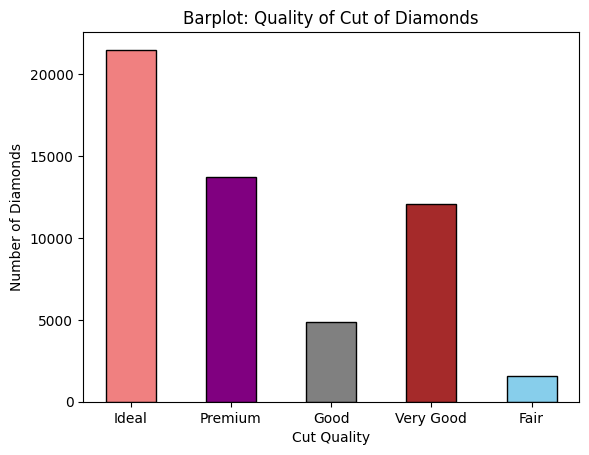

In [224]:
values = [] #declared empty value list to store the count of all the unique values of 'cut' column

labels = ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'] #initialized all the unique values of the 'cut' column in a list

for name in regression_df['cut'].unique(): #used for loop to iterate through each unique value of the 'cut' column
  values.append(regression_df[regression_df['cut'] == name].count()[0]) #appending the count of each unique value of 'cut' column in values list

plt.title("Barplot: Quality of Cut of Diamonds") #creating the title of the barplot
plt.ylabel("Number of Diamonds") #labeling the y-axis
plt.xlabel("Cut Quality") #labeling the x-axis

colors = ['lightcoral', 'purple', 'grey', 'brown', 'skyblue'] #storing the color of each bar of the barplot in a list

plt.bar(labels, values, color = colors, width = 0.5, edgecolor = '#000') #used the plt.barplot function to plot a bar plot for the 'cut' column of the dataframe

**Bar Plot**
> Bar plot is used for displaying the modality distribution of the carat quality column.

>**Modality Distribution:** The bar plot of the cut quality is unimodal because the is only one significant peak in the plot

>From the bar chart we can see that the highest number of diamonds have the ideal cut and the least number of diamonds have a fair cut

> Many diamonds also have a premium and a very good quality cut, whereas the diamonds with good quality cut are relatively low

###Bivariate Analysis

####Heatmap (Correlation between variables of dataset)

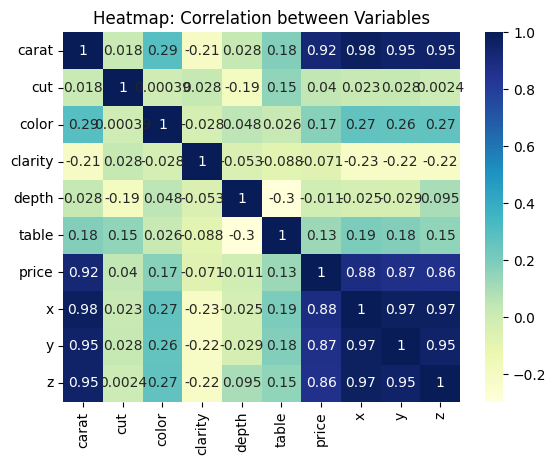

In [257]:
plt.title("Heatmap: Correlation between Variables") #creating the title of the heatmap
sns.heatmap(regression_df.corr(), annot = True, cmap = "YlGnBu") #using the heatmap function to display the correlation between the variables
plt.show() #used to display the figure(heatmap)

**Heatmap:**
> The above heatmap map is generated to show the correlation between variable of our dataframe.

> The value of correlation ranges from-1 to 1

> From the heatmap we can observe that there a strong positive correlation between target variable price and carat of the diamond. Similarly there are strong correlations between price, x(length), y (width) and z (depth) of the diamond.

> We can also notice that the diagonal elements of the heatmap are all 1's because the elements are pointing towards themselves in the heatmap which means that their co-variance and variance will be the same resulting a correlation of 1

In [241]:
regression_df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [242]:
labelEncoder = LabelEncoder() #using sklearns LabelEncoder function to convert categorical data to numerical data or ordinal encoding
regression_df["color"] = labelEncoder.fit_transform(regression_df['color'])  #ordinally encoding color column
regression_df["cut"] = labelEncoder.fit_transform(regression_df['cut'])  #ordinally encoding cut column
regression_df["clarity"] = labelEncoder.fit_transform(regression_df['clarity'])  #ordinally encoding clarity column

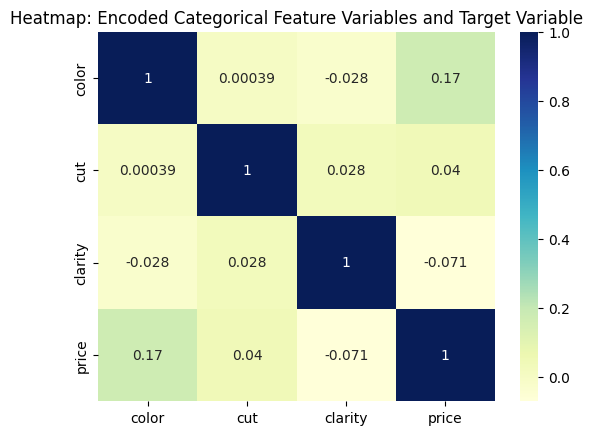

In [243]:
plt.title("Heatmap: Encoded Categorical Feature Variables and Target Variable") #creating the title of the heatmap
sns.heatmap(regression_df[['color', 'cut', 'clarity', 'price']].corr(), annot = True, cmap = "YlGnBu") #using the sns heatmap to check if there are any correlation between tha target variables and the encoded categorical data
plt.show() #used to display the figure

**Heatmap 2:**

> In the second heatmap we are checking the correlation between the target variable and encoded categorical variables.

> From the figure we can see the there is no strong correlation between any variables.

> The highest correlation that we can see with price is with color i.e. 0.17 which is still quite low

####Scatter Plot

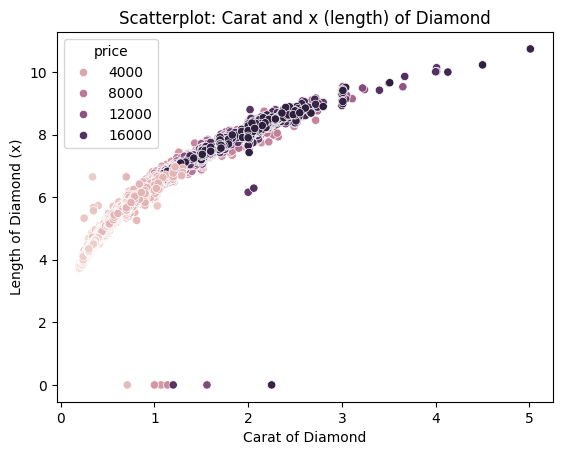

In [244]:
plt.title("Scatterplot: Carat and x (length) of Diamond") #creating title of the figure
sns.scatterplot(data = regression_df, x = 'carat', y = 'x', hue = 'price') #using scatterplot() function of seaborn library to gain the scatterplot of two variables
plt.ylabel('Length of Diamond (x)') #labeling the y-axis
plt.xlabel('Carat of Diamond') #labeling the x-axis
plt.show() #displaying the figure

**Scatterplot:**
> Scatterplot is used for looking certain patterns or relationship between variables.

> In the above scatter plot we can see that as the value of x increase the value of y also increases which shows a positive relationship between the variables.

> Moreover, as the value of both length of the diamond and the carat of the diamond increases the range of price is also increasing which we are able to observe with the help of hue property of seaborn

####Pairplot Plot

Text(0.5, 0.98, 'Pairplot : x, depth percentage and price of Diamonds')

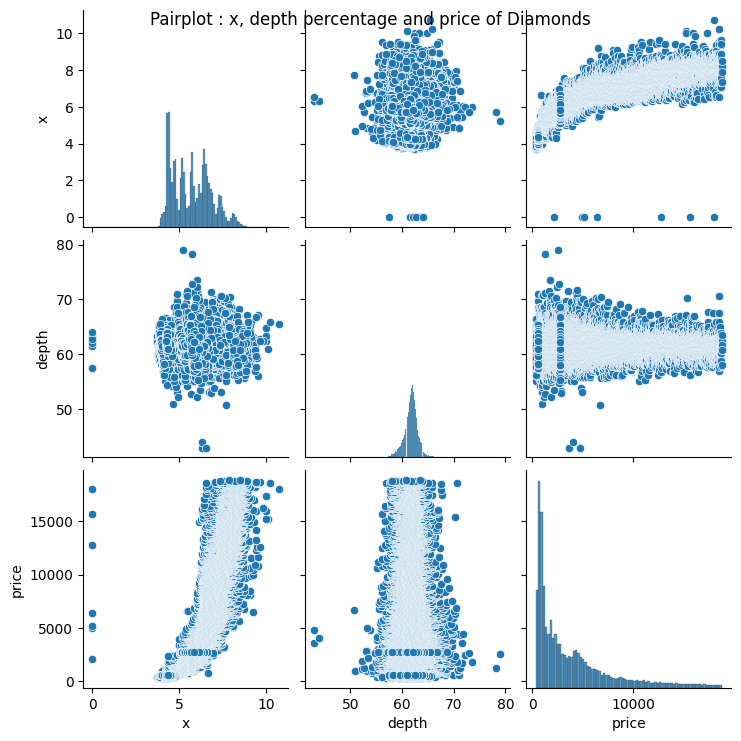

In [245]:
plots = sns.pairplot(data = regression_df, vars = ['x', 'depth', 'price']) #using the pairplot function to get the plots of 3 different variables
plots.fig.suptitle("Pairplot : x, depth percentage and price of Diamonds") #creating the title of the figure

**Pariplot:**
> From the pairplot we can see the scatterplots of different variables and also the histogram of the respective variables

> In the scatterplot between depth percentage and x(length) of diamond we can't see much relationship. The plots are concentrated at the center of the graph

> In the scatterplot of x(length) and price we can see that as the value of x increase the value of price also increase which shows a positive relationship

> In the scatterplot of price and depth percentage we can see the lack of relationship. As the value of price increases, the value of depth percentage remains constant at the center

##**Regression Models**

###Train Test Split

In [246]:
r_x = regression_df.drop(columns = 'price') #storing the features of the dataset in a variable
r_y = regression_df['price'] #storing the target of the dataset in a variable

In [247]:
R_X_train, R_X_test, r_y_train, r_y_test = train_test_split(r_x, r_y, test_size = 0.2)
#splitting the data into training and testing

###Linear Regression

> Linear Regression is a supervised machine learning algorithm which is used for regression tasks or predicting continuous values.

> In Linear regression equation of straight line is used for fitting the best lines between the target values.

> The best fitting line is determined by reducing the residuals between the actual and predicted values.

In [248]:
Linear_Regression_Model = LinearRegression() #calling the LinearRegression funtion for model building

In [249]:
Linear_Regression_Model.fit(R_X_train, r_y_train) #fitting the training and testing data in the model

LinearRegression()

In [250]:
r_y_pred_train = Linear_Regression_Model.predict(R_X_train) #prediction the target of the training data

In [251]:
r_y_pred_test = Linear_Regression_Model.predict(R_X_test) #predicting the target of the testing data

In [252]:
#Calculating the Mean Absolute Error in training and testing data
print("MAE(Mean Absolute Error) in Training Data:", mean_absolute_error(r_y_train, r_y_pred_train))
print("MAE(Mean Absolute Error) in Testing Data:",mean_absolute_error(r_y_test, r_y_pred_test))

MAE(Mean Absolute Error) in Training Data: 859.9643022795693
MAE(Mean Absolute Error) in Testing Data: 860.2803371264057


In [253]:
#Calculating the mean squared error in training and testing data
print("MSE(Mean Squared Error) in Training Data:", mean_squared_error(r_y_train, r_y_pred_train))
print("MSE(Mean Squared Error) in Testing Data", mean_squared_error(r_y_test, r_y_pred_test))

MSE(Mean Squared Error) in Training Data: 1842320.8016920963
MSE(Mean Squared Error) in Testing Data 1759772.7430961474


In [254]:
#Calculating the r2 score in the training and testing data
print("R2 Score in Training Data:", r2_score(r_y_train, r_y_pred_train))
print("R2 Score in Testing Data:", r2_score(r_y_test, r_y_pred_test))

R2 Score in Training Data: 0.8838701148996226
R2 Score in Testing Data: 0.890469507046695


###Support Vector Machine (Regression)

> Support Vector Machine(Regression) is a machine learning algorithm which finds the best fitting hyperplane in a continuous space

> SVM maps the input features into a higher dimensional space which helps in capturing relationship.

In [256]:
SupportVR_Model = SVR().fit(R_X_train, r_y_train) #using the Support Vector Regressor Function to fit the training data

In [258]:
r_y_pred_train = SupportVR_Model.predict(R_X_train) #storing the predicted target of the training data in a variable

In [259]:
r_y_pred_test = SupportVR_Model.predict(R_X_test) #storing the predicted target of the testing data in variable

In [260]:
#calculating the MAE of the training and testing data
print("MAE(Mean Absolute Error) in Training Data:", mean_absolute_error(r_y_train, r_y_pred_train))
print("MAE(Mean Absolute Error) in Testing Data:",mean_absolute_error(r_y_test, r_y_pred_test))

MAE(Mean Absolute Error) in Training Data: 2763.6933527113633
MAE(Mean Absolute Error) in Testing Data: 2767.5101042415145


In [261]:
#calculating the MSE in training and testing data
print("MSE(Mean Squared Error) in Training Data:", mean_squared_error(r_y_train, r_y_pred_train))
print("MSE(Mean Squared Error) in Testing Data", mean_squared_error(r_y_test, r_y_pred_test))

MSE(Mean Squared Error) in Training Data: 17826783.677635558
MSE(Mean Squared Error) in Testing Data 18008279.318998963


In [262]:
#Calculating the r2 score in the testing and training data
print("R2 Score in Training Data:", r2_score(r_y_train, r_y_pred_train))
print("R2 Score in Testing Data:", r2_score(r_y_test, r_y_pred_test))

R2 Score in Training Data: -0.12370350391293661
R2 Score in Testing Data: -0.12085820103135658


###Performace of Linear Regression Model and SVM Regressor Model

> R2 Scores of Both Models:
> * Linear Regression => Training-> 0.886, Testing-> 0.884
> * SVR => Training-> 0.124, Testing-> 0.123

> From the r2 scores we can see that linear regression is performing good. It it is clear that the SVM regressor is unable to catch any patterns from the dataset.

> Thus, Linear Regression Model is clearly the better model

###Hyperparameter Tuning

####Linear Regression Model

In [263]:
linear_parameters = {'fit_intercept': [True, False],
                     'copy_X': [True, False],
                     'positive': [True, False]} #Initializing the list of parameters that we can tune for linear regression in sklearn

In [264]:
Linear_Regression_Model_Tuned = GridSearchCV(LinearRegression(), linear_parameters)
#using GridSearchCV to find the best hyperparameters among the list of parameters provided by us

In [265]:
Linear_Regression_Model_Tuned.fit(R_X_train, r_y_train) #fitting the model with the best hyper parameters found from grid search

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [266]:
Linear_Regression_Model_Tuned.best_params_ #displaying the best hyper parameters for linear regression

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [267]:
r_y_pred_train = Linear_Regression_Model_Tuned.predict(R_X_train) #storing the predicted target variable of training data in a variable
r_y_pred_test = Linear_Regression_Model_Tuned.predict(R_X_test) #storing the predicted target variable of testing data in a variable

In [268]:
#finding the MAE for the training and testing data
print("MAE(Training Data):", mean_absolute_error(r_y_train, r_y_pred_train))
print("MAE(Testing Data):", mean_absolute_error(r_y_test, r_y_pred_test))

MAE(Training Data): 859.9643022795693
MAE(Testing Data): 860.2803371264057


In [269]:
#Finding the MSE for training and testing data
print("MSE(Training Data):", mean_squared_error(r_y_train, r_y_pred_train))
print("MSE(Testing Data)", mean_squared_error(r_y_test, r_y_pred_test))

MSE(Training Data): 1842320.8016920963
MSE(Testing Data) 1759772.7430961474


In [270]:
#finding the r2 score for testing and training data
print("R2 Score(Training Data):", r2_score(r_y_train, r_y_pred_train))
print("R2 Score(Testing Data):", r2_score(r_y_test, r_y_pred_test))

R2 Score(Training Data): 0.8838701148996226
R2 Score(Testing Data): 0.890469507046695


####Support Vector Machine (Regression)

In [271]:
support_parameters ={'C': [0.1, 1],
                     'kernel': ['rbf', 'linear']
                     } #storing the list of hyperparameters that can be the best for out model
SupportVR_Model_Tuned = GridSearchCV(SVR(), support_parameters, n_jobs = -1, verbose = 2, cv = 3)
 #using the GridSearchCV method to find the best hyper parameter among our provided list parameters

In [278]:
SupportVR_Model_Tuned.fit(R_X_train, r_y_train) #fitting the trianing data in the hyperparameter tuned model

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'kernel': ['rbf', 'linear']},
             verbose=2)

In [279]:
SupportVR_Model_Tuned.best_params_ #displaying the best hyperparameter determined by the gridsearchcv function

{'C': 1, 'kernel': 'linear'}

In [280]:
r_y_pred_train = SupportVR_Model_Tuned.predict(R_X_train) #storing the predicted target of the training data
r_y_pred_test = SupportVR_Model_Tuned.predict(R_X_test) #storing the predicted target of the testing data

In [281]:
#displaying the MAE of the model in both training and testing data
print("MAE(Training Data):", mean_absolute_error(r_y_train, r_y_pred_train))
print("MAE(Testing Data):", mean_absolute_error(r_y_test, r_y_pred_test))

MAE(Training Data): 1070.2829947609052
MAE(Testing Data): 1078.3248504466064


In [282]:
#displaying the MSE of the model in training and testing data
print("MSE(Training Data):", mean_squared_error(r_y_train, r_y_pred_train))
print("MSE(Testing Data)", mean_squared_error(r_y_test, r_y_pred_test))

MSE(Training Data): 3436710.5675465893
MSE(Testing Data) 3438639.698902566


In [283]:
#displaying the r2 score of the model in both training and testing data
print("R2 Score(Training Data):", r2_score(r_y_train, r_y_pred_train))
print("R2 Score(Testing Data):", r2_score(r_y_test, r_y_pred_test))

R2 Score(Training Data): 0.7833684540901473
R2 Score(Testing Data): 0.7859746931601246


####Observation After Hyperparameter Tuning

> After the hyperparameter tuning of Linear Regression and SVM regressor models, we can observe the following things:
> * The r2 score of the Linear Regression model remain quite similar in both training and testing.

> Whereas, the r2 score of the Support Vector Regressor increases significantly after the hyperparameter tuning

> R2 Scores Before Tuning(testing data):
> * Linear Regression => 0.88
> * SVR => -0.12

> R2 Scores After Tuning(testing data):
> * Linear Regression =>  0.88
> * SVR => 0.79

> We can see that after hyperparameter tuning the SVR is able to make prediction after training.

> Best HyperParameter:
> * Linear Regression => {'copy_X': True, 'fit_intercept': True, 'positive': False}
> * SVR => {'C': 1, 'kernel': 'linear'}

###Feature Selection

####Sequential Feature Selection (Wrapper Method)

In [284]:
Linear_Regression_Model_Tuned = LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None) #Creating a linear regression model

In [285]:
sequential_featureSelector = SequentialFeatureSelector(Linear_Regression_Model_Tuned, n_features_to_select = 5, direction='forward')
#finding the optimum features using the Sequential forward feature selection

In [286]:
sequential_featureSelector.fit(r_x, r_y) #fitting the features and target variable of the dataset

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [287]:
sequential_conn = sequential_featureSelector.get_support() #storing the boolean array of the column in a variable

In [288]:
r_x_selected_features_forward = r_x[r_x.columns[sequential_conn]] #storing the selected features in a variable
r_x_selected_features_forward.head() #displaying the first five rows of the selected features

,carat,depth,x,y,z
0,0.23,61.5,3.95,3.98,2.43
1,0.21,59.8,3.89,3.84,2.31
2,0.23,56.9,4.05,4.07,2.31
3,0.29,62.4,4.20,4.23,2.63
4,0.31,63.3,4.34,4.35,2.75


In [289]:
sequential_featureSelector = SequentialFeatureSelector(Linear_Regression_Model_Tuned, n_features_to_select = 5, direction = 'backward')
#finding the optimum features using the Sequential forward feature selection

In [290]:
sequential_featureSelector.fit(r_x, r_y)
#fitting the features and target variable of the dataset

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=5)

In [291]:
sequential_conn = sequential_featureSelector.get_support() #storing the boolean array of the column in a variable

In [292]:
r_x_selected_features_backward = r_x[r_x.columns[sequential_conn]] #storing the selected features in a variable
r_x_selected_features_backward.head() #displaying first 5 rows of the selected features

,carat,depth,x,y,z
0,0.23,61.5,3.95,3.98,2.43
1,0.21,59.8,3.89,3.84,2.31
2,0.23,56.9,4.05,4.07,2.31
3,0.29,62.4,4.20,4.23,2.63
4,0.31,63.3,4.34,4.35,2.75


####Checking Accuracy of Sequential Forward Selection

In [293]:
X_train, X_test, y_train, y_test = train_test_split(r_x_selected_features_forward, r_y, test_size = 0.2) #splitting the selected features into training and testing data

In [294]:
Linear_Regression_Model = LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None) #creating a linear regression model

In [295]:
Linear_Regression_Model.fit(X_train, y_train) #fitting the training data in the model

LinearRegression()

In [296]:
y_train_pred = Linear_Regression_Model.predict(X_train) #storing the predicted values of training data in a variable
y_test_pred = Linear_Regression_Model.predict(X_test) #storing the predicted values of testing data in a variable

In [297]:
#displaying the MAE in training and testing data
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

892.6487986100477
897.404788741519


In [298]:
#displaying the MSE in training and testing data
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

2283909.95232784
2282911.77874185


In [299]:
#displaying the r2 score in testing and training data
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.855591195639082
0.8596111941113078


In [300]:
SupportVR_Model = SVR(C = 1, kernel = 'linear') #creating a SVR model
SupportVR_Model.fit(X_train, y_train) #fitting the training data in the model

SVR(C=1, kernel='linear')

In [301]:
y_train_pred = SupportVR_Model.predict(X_train) #storing the predicted target of training data
y_test_pred = SupportVR_Model.predict(X_test) #storing the predicted target of testing data

In [302]:
#displaying the r2 score of both training and testing data
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7545349983212222
0.753115518574002


####Checking Accuracy of Sequential Backward Selection

In [303]:
X_train, X_test, y_train, y_test = train_test_split(r_x_selected_features_backward, r_y, test_size = 0.2) #splitting selected features in to training and testing data

In [304]:
Linear_Regression_Model = LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None) #creating a linear regression model

In [305]:
Linear_Regression_Model.fit(X_train, y_train) #fitting training data in the model

LinearRegression()

In [306]:
y_train_pred = Linear_Regression_Model.predict(X_train) #storing the predicted target of training data
y_test_pred = Linear_Regression_Model.predict(X_test) #storing the predicted target of testing data

In [307]:
#displaying the r2 score in the training and testing data of the model
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8575236291791286
0.8519375603382127


In [308]:
SupportVR_Model = SVR(C = 1, kernel = 'linear') #creating a SVR model
SupportVR_Model.fit(X_train, y_train) #fitting training data in the model

SVR(C=1, kernel='linear')

In [309]:
y_train_pred = SupportVR_Model.predict(X_train) #storing the predicted target of the training data
y_test_pred = SupportVR_Model.predict(X_test) #storing the predicted target of the testing data

In [310]:
#displaying the r2 score of the model in training and testing data
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7543665942752452
0.7567025407901171


####Observation

> After selecting the features using sequential forward selection and sequential backward selection we can see that the r2 scores that we obtained after using the selected features from both methods are similar

> Thus, we are using the sequential backward selection as both the method are producing the same results

###Final Models

####Train, Test, Split Final

In [311]:
X_train, X_test, y_train, y_test = train_test_split(r_x_selected_features_backward, r_y, test_size = 0.2)
 #splitting the data with only the selected features into training and testing data

####Linear Regression Final Model

In [312]:
Linear_Regression_Model= LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None)
#creating a linear regression model with the best hyperparameters found from the gridsearchcv function

In [313]:
Linear_Regression_Model.fit(X_train, y_train) #fitting the model with training data

LinearRegression()

In [314]:
y_train_pred = Linear_Regression_Model.predict(X_train) #storing predicted target variable of training data
y_test_pred = Linear_Regression_Model.predict(X_test) #storing the predicted target varible of testing data

In [316]:
#Displaying the MAE in both training and testing data
print("MAE (Training Data):", mean_absolute_error(y_train, y_train_pred))
print("MAE (Testing Data):", mean_absolute_error(y_test, y_test_pred))

MAE (Training Data): 900.080902820429
MAE (Testing Data): 882.1152038486567


In [315]:
#displaying the MSE in both training and testing data
print("MSE (Training Data):", mean_squared_error(y_train, y_train_pred))
print("MSE (Testing Data):", mean_squared_error(y_test, y_test_pred))

MSE (Training Data): 2295060.9874270097
MSE (Testing Data): 2238400.6293697213


In [317]:
#displaying the r2 score of the model in both training and testing data
print("R2 Score(Training Data):", r2_score(y_train, y_train_pred))
print("R2 Score(Testing Data)",r2_score(y_test, y_test_pred))

R2 Score(Training Data): 0.8558844068585325
R2 Score(Testing Data) 0.8585148343994298


####Support Vector Machine Final Model

In [318]:
SupportVR_Model = SVR(C = 1, kernel = 'linear') #creating a support vector regressor model

In [320]:
SupportVR_Model.fit(X_train, y_train) #fitting the model with training data

SVR(C=1, kernel='linear')

In [321]:
y_train_pred = SupportVR_Model.predict(X_train) #storing the predicted target variable of training data
y_test_pred = SupportVR_Model.predict(X_test) #storing the predicted target variable of testing data

In [322]:
#Displaying the MAE in training and testing data
print("MAE (Training Data): ", mean_absolute_error(y_train, y_train_pred))
print("MAE (Testing Data): ", mean_absolute_error(y_test, y_test_pred))

MAE (Training Data):  1128.4034692292887
MAE (Testing Data):  1122.2678632899124


In [323]:
#Displaying the MSE in training and testing data
print("MSE (Training Data): ", mean_squared_error(y_train, y_train_pred))
print("MSE (Testing Data): ", mean_squared_error(y_test, y_test_pred))

MSE (Training Data):  3919975.174049381
MSE (Testing Data):  3833686.6840992244


In [324]:
#Displaying the r2 score in training and testing data
print("R2 Score (Training Data):", r2_score(y_train, y_train_pred))
print("R2 Score (Testing Data):", r2_score(y_test, y_test_pred))

R2 Score (Training Data): 0.753849875710146
R2 Score (Testing Data): 0.7576797521214024


###Conclusion

> For Regression we built two models,
> * Linear Regression Model
> * SVM Regression Model

> First we built the models of linear regression and SVM regression without hyperparameter tuning

> Then, we did the hyper parameter tuning for the models and checked the r2 score of the tuned models

> After hyperparameter tuning we performed feature selection using the Sequential Feature Selector(Wrapper method). We selected both the sequential forward and sequential backward method of feature selection and compared the selected features of both the methods.

> For the final model we used best hyperparameters and features selected from the Sequential Backward Selection to build the model.

> After hyperparameter tuning, the r2 score of the models slighty increased. But, after the feature selection the r2 scores of the models decresed

> Final Model Results:
> * Linear Regression => 0.85
> * SVR => 0.75

> From this coursework, we were able to gain knowledge about data analysis, data visualization, data preprocessing. We also got knowledge about different types of machine learning models. We learnt to build machine learning models using sklearn library.

> After this coursework, I would like to learning more about supervised machine learning. And after gaining the knowlegde in supervised machine learning I would like to learn about unsupervised machine learning in the future
